In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import confusion_matrix

In [10]:
df = pd.concat([
    pd.read_csv("csvs/first_half_worst.csv", index_col= 0),
    pd.read_csv("csvs/second_half_worst.csv", index_col= 0),
])

df["Prediction"] = df.predicted.map({0:"Cat", 1:"Dog"})
df['Validate'] =  df.true_label.map({0:"Cat", 1:"Dog"})
(df.Validate == df.Label).all()

True

In [11]:

df.to_csv("csvs/worst.csv")



def visulize_img(row):
    
    img = plt.imread(row.Path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Label: {row.Label}, Pred: {row.Prediction}, Loss: {float(row.loss) :.2f}")
    plt.tight_layout()
    plt.show()


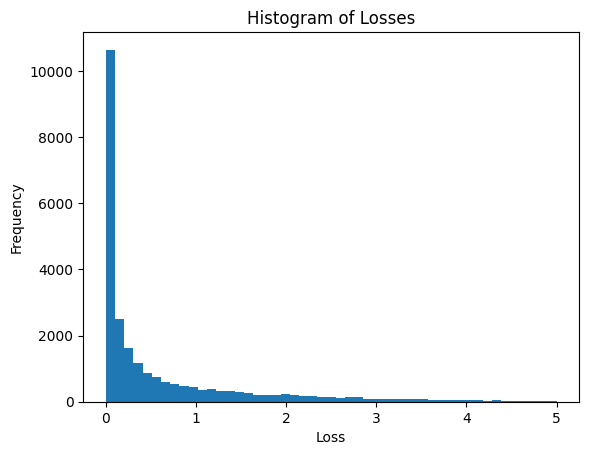

In [12]:
bins = np.linspace(0, 5, 50)  # 50 bins between 0 and 5, but you can adjust the number as desired

df.loss.plot.hist(bins=bins)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

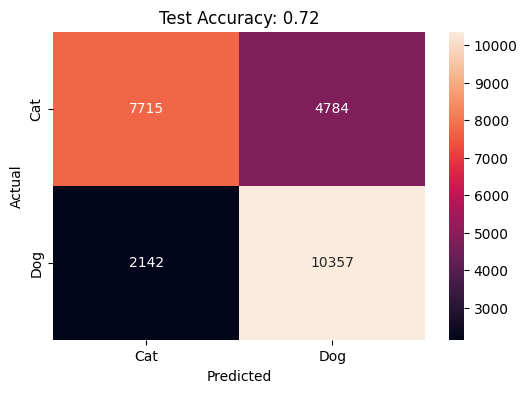

In [13]:
cm = confusion_matrix(df['Label'], df['Prediction'])

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])

test_acc = float((df.Prediction == df.Label).mean())

plt.title(f"Test Accuracy: {test_acc:.2f}")


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
df.sort_values("loss")

,Path,Label,loss,predicted,true_label,logits_cat,logits_dog,Prediction,Validate
2859,PetImages/Dog/1320.jpg,Dog,-0.000000,1,1,1.798248e-08,1.0,Dog,Dog
3566,PetImages/Dog/1958.jpg,Dog,-0.000000,1,1,2.821004e-17,1.0,Dog,Dog
6496,PetImages/Dog/4595.jpg,Dog,-0.000000,1,1,3.435422e-09,1.0,Dog,Dog
6399,PetImages/Dog/4507.jpg,Dog,-0.000000,1,1,3.694911e-13,1.0,Dog,Dog
11965,PetImages/Dog/9517.jpg,Dog,-0.000000,1,1,1.163947e-09,1.0,Dog,Dog
...,...,...,...,...,...,...,...,...,...
42,PetImages/Cat/10034.jpg,Cat,19.722626,1,0,2.720022e-09,1.0,Dog,Cat
1742,PetImages/Cat/11565.jpg,Cat,21.678660,1,0,3.846607e-10,1.0,Dog,Cat
6433,PetImages/Cat/4538.jpg,Cat,36.219860,1,0,1.861721e-16,1.0,Dog,Cat
3098,PetImages/Cat/1536.jpg,Cat,43.277620,1,0,1.602393e-19,1.0,Dog,Cat


In [15]:
dogs = df.query("Label == 'Dog'").copy().sort_values("loss", ascending= False)
cats = df.query("Label == 'Cat'").copy().sort_values("loss", ascending= False)

index = int(len(dogs) * 0.2) +1

test = pd.concat([
    dogs.iloc[:index],
    cats.iloc[:index],
])

train = pd.concat([
    dogs.iloc[index:],
    cats.iloc[index:],
])

total = len(train) + len(test)
len(train) / total, len(test) / total

(0.7999839987198976, 0.2000160012801024)

In [16]:
train.to_csv("csvs/train.csv")
test.to_csv("csvs/test.csv")